In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df=pd.read_csv("homeprices.csv")

In [3]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


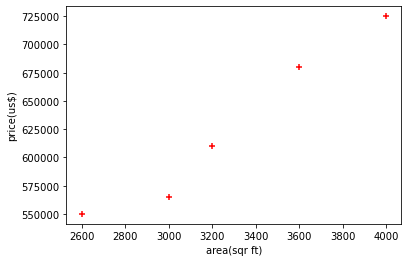

In [4]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(us$)')
plt.scatter(df['area'],df['price'],color='red',marker='+')

In [5]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [6]:
new_df=df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [7]:
price=df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [8]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [9]:
#prediction
reg.predict([[3300]])

array([628715.75342466])

In [10]:
reg.coef_

array([135.78767123])

In [11]:
reg.intercept_

180616.43835616432

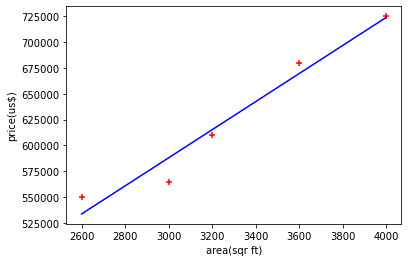

In [12]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(us$)')
plt.scatter(df['area'],df['price'],color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [13]:
d=pd.read_csv("areas.csv")
d.head(3)

,area
0,100
1,1500
2,2300


In [14]:
p=reg.predict(d)

In [15]:
d['prices']=p

In [16]:
d.to_csv("prediction.csv",index=False)

In [17]:
#exercise

canada= pd.read_csv("canada_per_capita_income.csv")

In [18]:
canada.head()

,year,per_capita_income_(US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


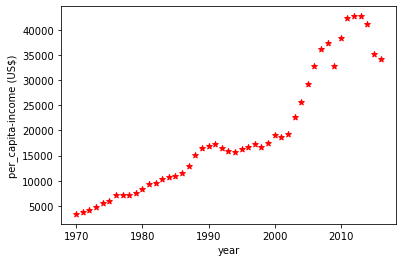

In [19]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per_capita-income (US$)')
plt.scatter(canada['year'],canada['per_capita_income_(US$)'],color='red',marker='*')

In [20]:
new_year=canada.drop('per_capita_income_(US$)',axis='columns')
new_year.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [21]:
income=canada['per_capita_income_(US$)']

In [22]:
reg1=linear_model.LinearRegression()
reg1.fit(new_year,income)

LinearRegression()

In [23]:
reg1.predict([[2020]])

array([41288.69409442])

# Save Model Using pickle

In [25]:
import pickle

In [27]:
with open('model_pickle','wb') as file:
    pickle.dump(reg1,file)

In [28]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)

In [29]:
mp.coef_

array([828.46507522])

In [30]:
mp.predict([[2020]])

array([41288.69409442])

# Save Model Using Joblib

In [34]:
import joblib

In [35]:
joblib.dump(reg1,'model_joblib')

['model_joblib']

In [36]:
mj=joblib.load('model_joblib')

In [37]:
mj.coef_

array([828.46507522])

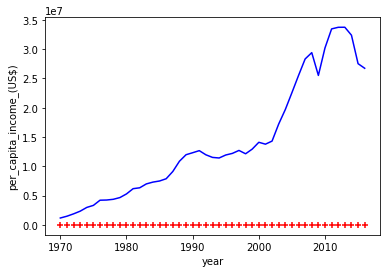

In [24]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per_capita_income_(US$)')
plt.scatter(canada['year'],canada['per_capita_income_(US$)'],color='red',marker='+')
plt.plot(canada.year,reg1.predict(canada[['per_capita_income_(US$)']]),color='blue')